In [116]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
P=2+2+0+0+4+5+5
print(P)

18


$2$. [R] Generate 2000 samples from a normal distribution with mean $µ$ = p and standard deviation $σ$ = p/2. Plot
the histogram

Solution:

In [118]:
mean = P
std_dev = P/2
sample_size = 2000

Text(0, 0.5, 'Frequency')

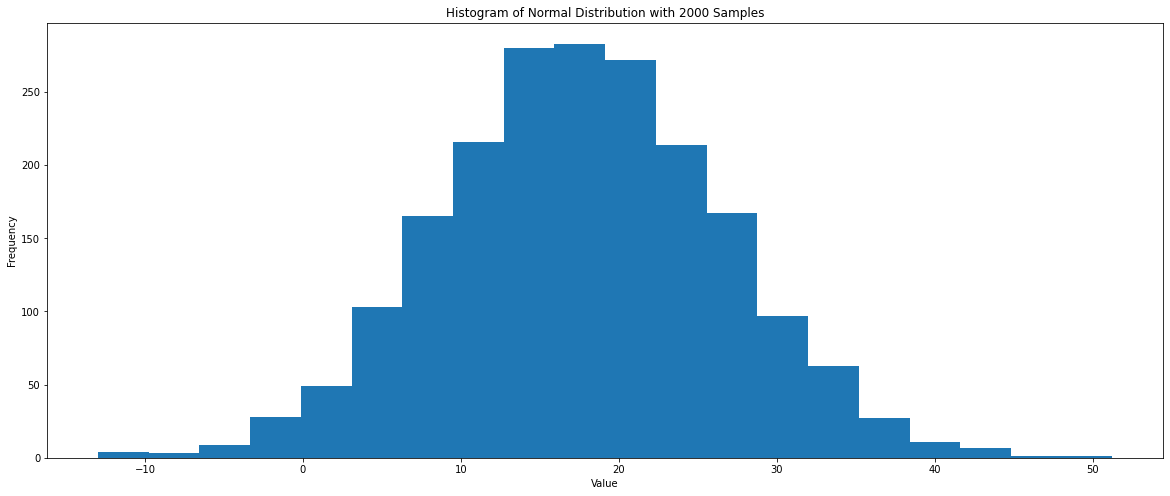

In [119]:
samples = np.random.normal(mean, std_dev, sample_size)
plt.figure(figsize=(20,8))
plt.hist(samples,bins=20)
plt.title('Histogram of Normal Distribution with 2000 Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')

$5$. [R] Now, we will consider the likelihood function. The likelihood is defined as follows,
P(D/µobs, σa) = Qn
i=1(1/
p
2πσ2
a
) ∗ (e
−[(di−µobs)
2/(2σ
2
a
)])
Where di
is data point D, µobs = µ is known (as of now) and a = new or current. We will take logarithm on both
sides and define log-likelihood as follows,
L(D/µobs, σa) = Pn
i=1 log [(1/
p
2πσ2
a
) ∗ (e
−[(di−µobs)
2/(2σ
2
a
)])]
Explain why taking logarithms is helpful. Write a function in python that returns L(D/µobs, σa).


Solution:

In [120]:
def prior(theta):
  if theta[1] > 0:
    return 1
  else:
    return 0

In [121]:
def tr_model(theta):
  return [theta[0], np.random.normal(theta[1], 1)]

In [122]:
def log_like(theta, D):
  return np.sum(-np.log(theta[1]*np.sqrt(2*np.pi))-((D-theta[0])**2)/(2*theta[1]**2))

Log is an increasing function so, monotonocity does changes after taking log. We use log likelihood because it is better as it has more floating point precision.

In [123]:
def acceptance(theta, theta_new):
  if theta_new>theta:
    return True
  else:
    if np.random.uniform(0,1)<np.exp(theta_new-theta):
      return True
    else:
      return False

In [124]:
def Metropolis_Algorithm(log_like, prior, tr_model, Initial_State, Iterations, D, acceptance):
  theta = Initial_State
  Accepted, Rejected, Iteration_Accepted, Iteration_Rejected = [], [], [], []
  for i in range(Iterations):
    theta_new = tr_model(theta)
    theta_lik = log_like(theta, D)
    theta_new_lik = log_like(theta_new, D) 
    if acceptance(theta_lik + np.log(prior(theta)), theta_new_lik + np.log(prior(theta_new))) == True:            
      theta = theta_new
      Accepted.append(theta_new)
      Iteration_Accepted.append(i)
    else:
      Rejected.append(theta_new) 
      Iteration_Rejected.append(i)          
  return np.array(Accepted), np.array(Rejected), np.array(Iteration_Accepted), np.array(Iteration_Rejected)

$7$. [R] Proceed similarly as you do in the generic Metropolis algorithm. Start with an initial state θ0 = (p, 0.1). Run
the MCMC for 50000 iterations and keep track of accepted and rejected σ values. Plot both accepted and rejected σ
values against iteration for the first 500 iterations. Then plot the same for all iterations. Explain your observations

For First 500 Iterations :


Text(0, 0.5, 'sigma')

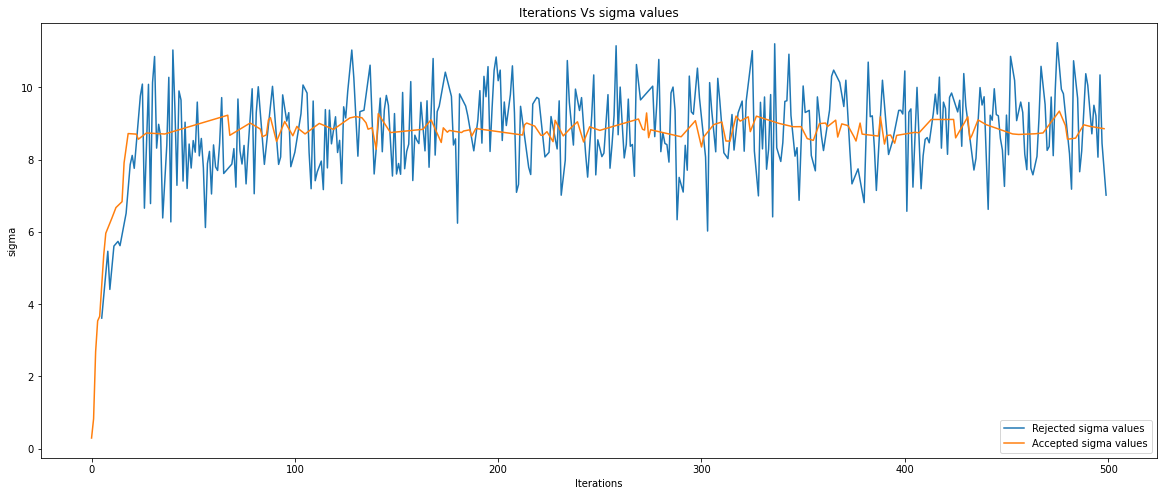

In [125]:
Accepted, Rejected, Iteration_Accepted, Iteration_Rejected = Metropolis_Algorithm(log_like, prior, tr_model, [P,0.1], 500, np.random.normal(P, P/2, 1000), acceptance)
print('For First 500 Iterations :')
plt.figure(figsize=(20,8))
plt.plot(Iteration_Rejected, Rejected[:,1], label = r'Rejected sigma values')
plt.plot(Iteration_Accepted, Accepted[:,1], label = r'Accepted sigma values')
plt.legend()
plt.title(r'Iterations Vs sigma values')
plt.xlabel('Iterations')
plt.ylabel(r'sigma')

<ipython-input-122-73b4c45b3b37>:2: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(theta[1]*np.sqrt(2*np.pi))-((D-theta[0])**2)/(2*theta[1]**2))
<ipython-input-124-4690931d5228>:8: RuntimeWarning: divide by zero encountered in log
  if acceptance(theta_lik + np.log(prior(theta)), theta_new_lik + np.log(prior(theta_new))) == True:


For 50000 Iterations :


[]

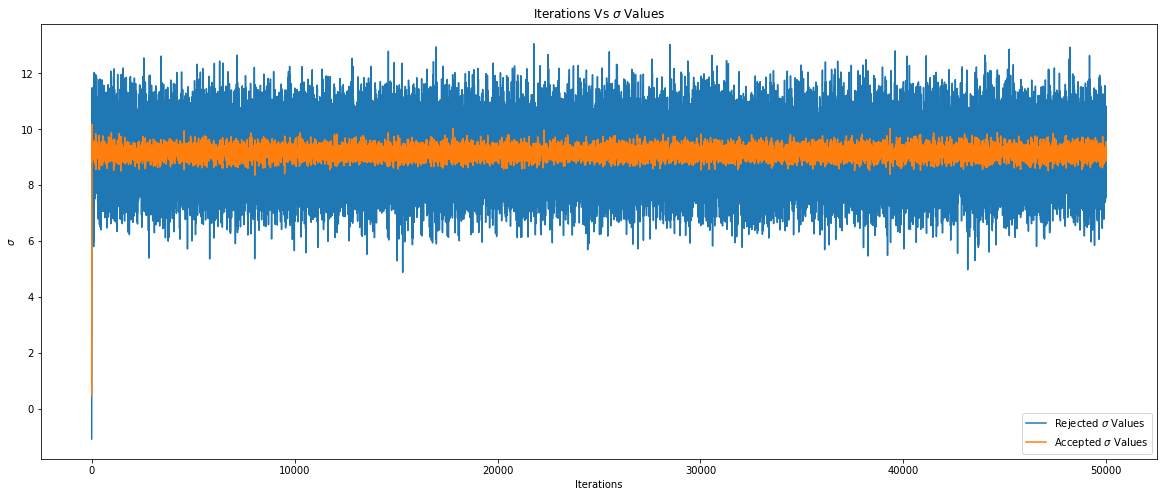

In [126]:
Accepted, Rejected, Iteration_Accepted, Iteration_Rejected = Metropolis_Algorithm(log_like, prior, tr_model, [P,0.1], 50000, np.random.normal(P,P/2, 1000), acceptance)
print('For 50000 Iterations :')
plt.figure(figsize=(20,8))
plt.plot(Iteration_Rejected, Rejected[:,1], label = r'Rejected sigma Values')
plt.plot(Iteration_Accepted, Accepted[:,1], label = r'Accepted sigma Values')
plt.legend()
plt.title(r'Iterations Vs sigma Values')
plt.xlabel('Iterations')
plt.ylabel(r'sigma')
plt.plot()

the rejected region of $\sigma$ values is oscillating very fastly aroud $\sigma = 9$ and the accepted region is converging nearby $\sigma = 9$.

$8$. [R] Discard the first 25% of the σ values which are accepted. Plot the histogram of the remaining σ values.
Explain your observations. Why dropping first few σ values makes sense?


Solution:

Text(0.5, 1.0, 'Histogram of Last 75% Accepted sigma values')

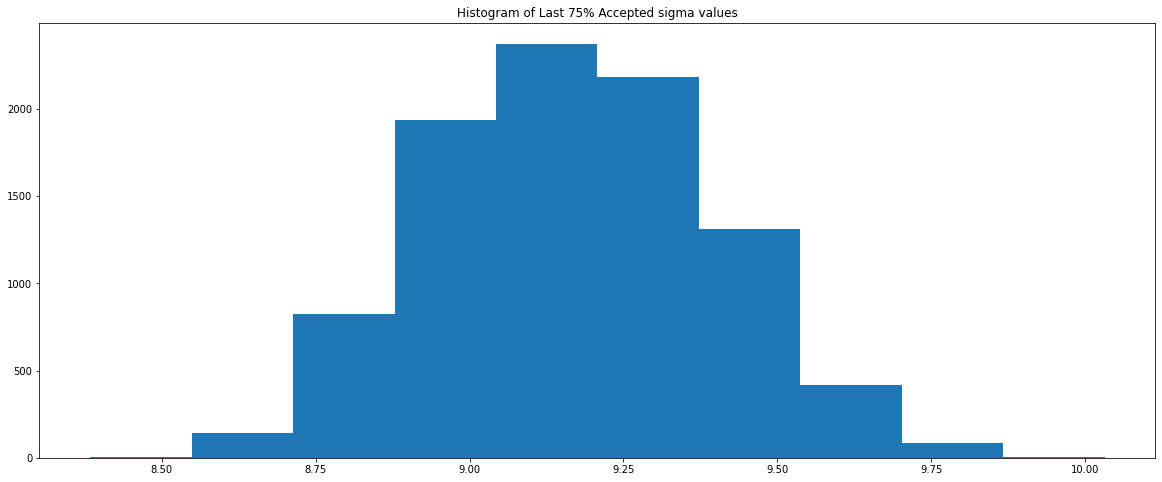

In [127]:
New_Accepted = Accepted[:,1][int(0.25*len(Accepted[:,1]))::]
plt.figure(figsize=(20,8))
plt.hist(New_Accepted)
plt.title(r'Histogram of Last 75% Accepted sigma values')

#Dropping first few sigma values makes sense because the acceptance region is taking some time to converge.

$10$. [R] Start with initial value θ0 = (p/2, 0.1) and run the algorithm for some suitable iterates. After discarding
first 25% of accepcted θ, plot separate histogram for µ and σ.

Solution:

In [99]:
def new_prior(theta):
  if theta[1] > 0:
    if P/2 <= theta[0] <= P+P/2:
      return 1/10
    else:
      return 0
  else:
    return 0

def new_tr_model(theta):
  return np.random.multivariate_normal(theta, np.identity(2))

def new_log_likelihood(theta, D):
  return np.sum(-np.log(theta[1] * np.sqrt(2* np.pi))-((D-theta[0])**2) / (2*theta[1]**2))
  
def new_acceptance(theta_current, theta_new):
  if theta_new > theta_current:
    return True
  else:
    if np.random.uniform(0,1) < np.exp(theta_new - theta_current):
      return True
    else:
      return False

def New_Metropolis_Algorithm(new_log_likelihood, new_prior, new_tr_model, Initial_State, Iterations, D, new_acceptance):
  theta = Initial_State
  Accepted, Rejected, Iteration_Accepted, Iteration_Rejected = [], [], [], []
  for i in range(Iterations):
    theta_new = new_tr_model(theta)
    theta_lik = new_log_likelihood(theta, D)
    theta_new_lik = new_log_likelihood(theta_new, D) 
    if new_acceptance(theta_lik + np.log(new_prior(theta)), theta_new_lik + np.log(new_prior(theta_new))) == True:            
      theta = theta_new
      Accepted.append(theta_new)
      Iteration_Accepted.append(i)
    else:
      Rejected.append(theta_new) 
      Iteration_Rejected.append(i)          
  return np.array(Accepted), np.array(Rejected), np.array(Iteration_Accepted), np.array(Iteration_Rejected)

number of iteration = 40000

Histogram of Last 75% Accepted $\mu$ values :

<ipython-input-99-fb37960275dc>:14: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(theta[1] * np.sqrt(2* np.pi))-((D-theta[0])**2) / (2*theta[1]**2))
<ipython-input-99-fb37960275dc>:32: RuntimeWarning: divide by zero encountered in log
  if new_acceptance(theta_lik + np.log(new_prior(theta)), theta_new_lik + np.log(new_prior(theta_new))) == True:


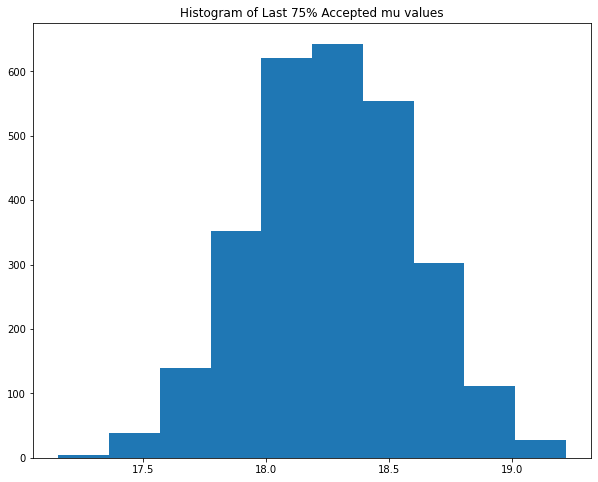

In [128]:
Accepted, Rejected, Iteration_Accepted, Iteration_Rejected = New_Metropolis_Algorithm(new_log_likelihood, new_prior, new_tr_model, [P/2,0.1], 40000, np.random.normal(P, P/2, 1000), new_acceptance)

New_Accepted_mu = Accepted[:,0][int(0.25*len(Accepted[:,0]))::]
plt.figure(figsize=(10,8))
plt.hist(New_Accepted_mu)
plt.title(r'Histogram of Last 75% Accepted mu values')
plt.show()

Histogram of Last 75% Accepted $\sigma$ values :

Text(0.5, 1.0, 'Histogram of Last 75% Accepted sigma values')

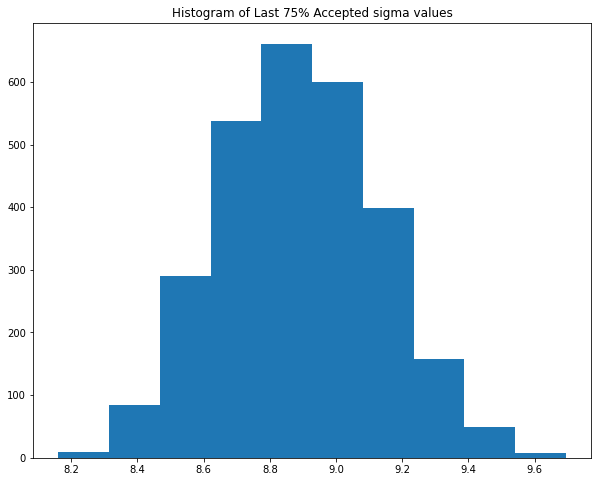

In [129]:
New_Accepted_sigma = Accepted[:,1][int(0.25*len(Accepted[:,1]))::]
plt.figure(figsize=(10,8))
plt.hist(New_Accepted_sigma)
plt.title(r'Histogram of Last 75% Accepted sigma values')

For number of iteration = 20000

Histogram of Last 75% Accepted $\mu$ values :

<ipython-input-99-fb37960275dc>:32: RuntimeWarning: divide by zero encountered in log
  if new_acceptance(theta_lik + np.log(new_prior(theta)), theta_new_lik + np.log(new_prior(theta_new))) == True:
<ipython-input-99-fb37960275dc>:14: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(theta[1] * np.sqrt(2* np.pi))-((D-theta[0])**2) / (2*theta[1]**2))


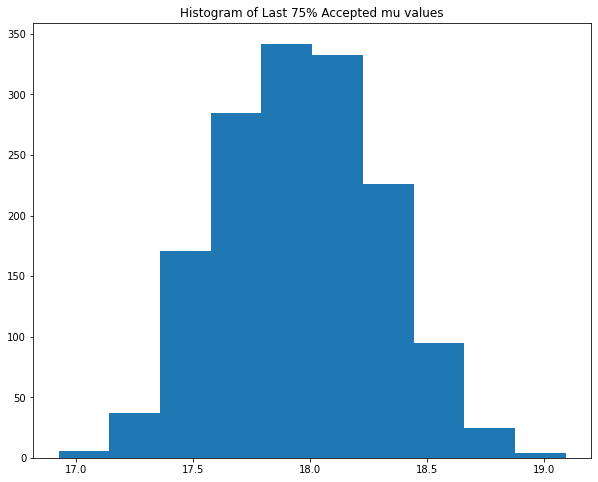

In [130]:
Accepted, Rejected, Iteration_Accepted, Iteration_Rejected = New_Metropolis_Algorithm(new_log_likelihood, new_prior, new_tr_model, [P/2,0.1], 20000, np.random.normal(P, P/2, 1000), new_acceptance)

New_Accepted_mu = Accepted[:,0][int(0.25*len(Accepted[:,0]))::]
plt.figure(figsize=(10,8))
plt.hist(New_Accepted_mu)
plt.title(r'Histogram of Last 75% Accepted mu values')
plt.show()

Histogram of Last 75% Accepted sigma values:

Text(0.5, 1.0, 'Histogram of Last 75% Accepted sigma values')

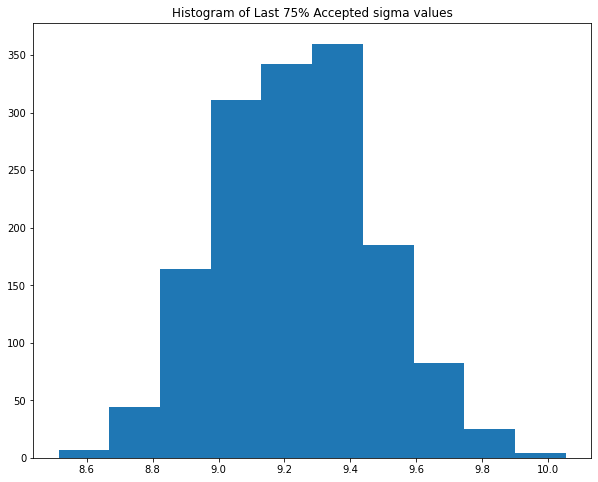

In [131]:
New_Accepted_sigma = Accepted[:,1][int(0.25*len(Accepted[:,1]))::]
plt.figure(figsize=(10,8))
plt.hist(New_Accepted_sigma)
plt.title(r'Histogram of Last 75% Accepted sigma values')